In [12]:
# Load libraries for preliminary data analysis:
library(tidyverse)
library(repr)
library(readxl)
library(GGally)

In [13]:
options(repr.matrix.max.rows = 16)

fb_data <- read_csv2("https://gist.githubusercontent.com/KolCrooks/691e5890b6747b4777d6032f019b2c0f/raw/20629a5da3d5a7683e3071798876f3e4b204fbbb/fb_data.csv",  col_types = cols())
colnames(fb_data) <- c("page_likes", "type", "category", "post_month", "post_weekday", "post_hour", "paid", "reach", 
      "impressions", "engaged_users", "post_consumers", "post_consumptions", "impressions_by_people_that_liked_page", 
      "reach_by_people_that_like_page", "people_liked_and_engaged", "comments", "likes", "shares", "interactions")
options(repr.matrix.max.rows = 16)

fb_data <- fb_data %>% 
        mutate(type = as_factor(type)) %>% 
        mutate(category = as_factor(category)) %>% 
        mutate(post_month = as_factor(post_month)) %>% 
        mutate(post_weekday = as_factor(post_weekday)) %>% 
        mutate(post_hour = as_factor(post_hour)) %>% 
        mutate(comment_percent = comments / interactions) %>% 
        mutate(like_percent = likes / interactions) %>% 
        mutate(share_percent = shares / interactions)

fb_split <- initial_split(fb_data, prop = 0.75, strata = type)  
fb_train <- training(fb_split)   
fb_test <- testing(fb_split)
fb_train

ℹ Using ',' as decimal and '.' as grouping mark. Use `read_delim()` for more control.



ERROR: Error in initial_split(fb_data, prop = 0.75, strata = type): could not find function "initial_split"


In [14]:
#select interested columns
fb_selected_data <- select (fb_data, -category, -post_month, -post_weekday, -post_hour)
 
fb_selected_data

page_likes,type,paid,reach,impressions,engaged_users,post_consumers,post_consumptions,impressions_by_people_that_liked_page,reach_by_people_that_like_page,people_liked_and_engaged,comments,likes,shares,interactions,comment_percent,like_percent,share_percent
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
139441,Photo,0,2752,5091,178,109,159,3078,1640,119,4,79,17,100,0.040000000,0.7900000,0.17000000
139441,Status,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164,0.030487805,0.7926829,0.17682927
139441,Photo,0,2413,4373,177,113,154,2812,1503,132,0,66,14,80,0.000000000,0.8250000,0.17500000
139441,Photo,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,1777,0.032639280,0.8846370,0.08272369
139441,Photo,0,7244,13594,671,410,580,6228,3200,396,19,325,49,393,0.048346056,0.8269720,0.12468193
139441,Status,0,10472,20849,1191,1073,1389,16034,7852,1016,1,152,33,186,0.005376344,0.8172043,0.17741935
139441,Photo,1,11692,19479,481,265,364,15432,9328,379,3,249,27,279,0.010752688,0.8924731,0.09677419
139441,Photo,1,13720,24137,537,232,305,19728,11056,422,0,325,14,339,0.000000000,0.9587021,0.04129794
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 14
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removing 1 row that contained a missing value”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removing 1 row that contained a missing value”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 4 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 6 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 6 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 9 rows containing missing values”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot

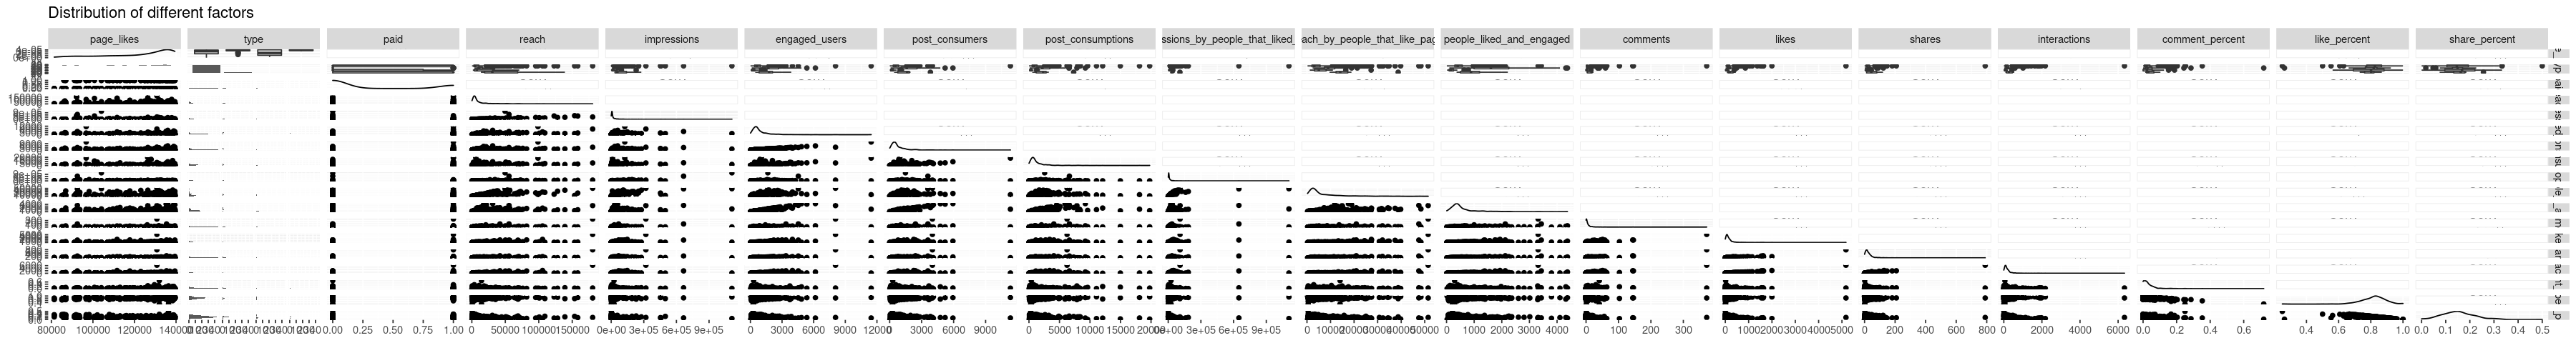

In [15]:
options(repr.plot.width = 30, repr.plot.height = 4)

fb_plot <- fb_selected_data %>% 
    ggpairs() +
    ggtitle("Distribution of different factors")
    theme(text = element_text(size=14))
# fb_plot$nrow <- 1
# fb_plot$yAxisLabels <- fb_plot$yAxisLabels[1]
fb_plot

In [16]:
summary(fb_data)

   page_likes         type     category   post_month  post_weekday
 Min.   : 81370   Photo :426   1:215    10     : 60   1:68        
 1st Qu.:112676   Status: 45   2:130    7      : 52   2:66        
 Median :129600   Link  : 22   3:155    4      : 50   3:64        
 Mean   :123194   Video :  7            12     : 50   4:72        
 3rd Qu.:136393                         6      : 49   5:67        
 Max.   :139441                         11     : 45   6:81        
                                        (Other):194   7:82        
   post_hour        paid            reach         impressions     
 3      :105   Min.   :0.0000   Min.   :   238   Min.   :    570  
 10     : 78   1st Qu.:0.0000   1st Qu.:  3315   1st Qu.:   5695  
 13     : 52   Median :0.0000   Median :  5281   Median :   9051  
 11     : 44   Mean   :0.2786   Mean   : 13903   Mean   :  29586  
 2      : 39   3rd Qu.:1.0000   3rd Qu.: 13168   3rd Qu.:  22086  
 4      : 35   Max.   :1.0000   Max.   :180480   Max.   :11102